# Thông tin sinh viên


*   Họ và tên: Lê Trọng Đại Trường
*   MSSV: 22521576



# Bài tập 2

In [1]:
#Cài đặt các thư viện cần thiết
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

  Using cached osmnet-0.1.7-py3-none-any.whl.metadata (3.6 kB)
Using cached osmnet-0.1.7-py3-none-any.whl (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.0 MB/s eta 0:00:00


In [2]:
!wget https://raw.githubusercontent.com/CityScope/CSL_HCMC/main/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp
!wget https://raw.githubusercontent.com/CityScope/CSL_HCMC/main/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shx
!wget https://raw.githubusercontent.com/CityScope/CSL_HCMC/main/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.dbf
!wget https://raw.githubusercontent.com/CityScope/CSL_HCMC/main/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.cpg
!wget https://raw.githubusercontent.com/CityScope/CSL_HCMC/main/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.prj
!wget https://raw.githubusercontent.com/CityScope/CSL_HCMC/main/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.sbn

--2024-10-20 14:41:39--  https://raw.githubusercontent.com/CityScope/CSL_HCMC/main/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 523956 (512K) [application/octet-stream]
Saving to: ‘Population_District_Level.shp’

Population_District 100%[===================>] 511.68K  --.-KB/s    in 0.05s   

2024-10-20 14:41:39 (10.7 MB/s) - ‘Population_District_Level.shp’ saved [523956/523956]

--2024-10-20 14:41:39--  https://raw.githubusercontent.com/CityScope/CSL_HCMC/main/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Con

In [2]:
#Load ranh giới quận huyện và dân số quận huyện
import geopandas as gpd

file_path = '/content/Population_District_Level.shp'

try:
  gdf = gpd.read_file(file_path)
  print(gdf.head())
except FileNotFoundError:
  print(f"Error: File not found at path: {file_path}")

    Dist_Name Dist_ID     Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  \
0  District 1     760  District  180225.0  187435.0  187419.0  190943.0   
1  District 3     770  District  190553.0  188945.0  190631.0  191580.0   
2  District 4     773  District  180980.0  183261.0  184711.0  185649.0   
3  District 6     775  District  249329.0  253474.0  254212.0  257865.0   
4  District 7     778  District  244276.0  274828.0  268483.0  266633.0   

   Pop_2013  Pop_2014  Pop_2015  ...  Den_2012  Den_2013  Den_2014  Den_2015  \
0  197421.0  200297.0  193632.0  ...  24749.60  25589.30  25962.10  25098.20   
1  193206.0  193694.0  196333.0  ...  38897.10  39227.20  39326.30  39862.10   
2  185808.0  187157.0  186727.0  ...  44428.40  44466.50  44789.30  44686.40   
3  266121.0  257183.0  258945.0  ...  36105.70  37261.60  36010.20  36256.90   
4  280743.0  296757.0  310178.0  ...   7563.59   7963.85   8418.12   8798.84   

   Den_2016  Den_2017  Den_2019    Shape_Leng    Shape_Area  \
0   2

In [12]:
!unzip /content/click_data.json.zip

Archive:  /content/click_data.json.zip
  inflating: click_data.json         
  inflating: __MACOSX/._click_data.json  


In [3]:
# Load dữ liệu click của người dùng
gdf_clicks = gpd.read_file('/content/click_data.json').to_crs(gdf.crs)
gdf_clicks

,dbh,geometry
0,1,POINT (687074.226 1200044.747)
1,1,POINT (687752.36 1188252.815)
2,1,POINT (681813.99 1197998.313)
3,1,POINT (681761.573 1198052.679)
4,1,POINT (681442.508 1198483.069)
...,...,...
83670,1,POINT (681095.997 1199156.208)
83671,1,POINT (691495.565 1200249.907)
83672,1,POINT (689394.818 1186828.972)
83673,1,POINT (683268.233 1197009.824)


In [4]:
gdf['Growth_Rate'] = (gdf['Pop_2019'] / gdf['Pop_2017'])
print(gdf.head())

    Dist_Name Dist_ID     Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  \
0  District 1     760  District  180225.0  187435.0  187419.0  190943.0   
1  District 3     770  District  190553.0  188945.0  190631.0  191580.0   
2  District 4     773  District  180980.0  183261.0  184711.0  185649.0   
3  District 6     775  District  249329.0  253474.0  254212.0  257865.0   
4  District 7     778  District  244276.0  274828.0  268483.0  266633.0   

   Pop_2013  Pop_2014  Pop_2015  ...  Den_2013  Den_2014  Den_2015  Den_2016  \
0  197421.0  200297.0  193632.0  ...  25589.30  25962.10  25098.20   27022.1   
1  193206.0  193694.0  196333.0  ...  39227.20  39326.30  39862.10   40221.7   
2  185808.0  187157.0  186727.0  ...  44466.50  44789.30  44686.40   44750.6   
3  266121.0  257183.0  258945.0  ...  37261.60  36010.20  36256.90   36508.5   
4  280743.0  296757.0  310178.0  ...   7963.85   8418.12   8798.84    9006.2   

   Den_2017  Den_2019    Shape_Leng    Shape_Area  \
0  27377.90   1

In [5]:
# Lọc ra 10 quận huyện có tốc độ tăng dân số nhanh nhất (Pop2019/Pop2017)
top_ten_growth = gdf.sort_values('Growth_Rate', ascending=False).head(10)
top_ten_growth


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Growth_Rate
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.700,2494.230,2543.500,2592.320,2719.580,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.180,3799.160,3869.460,3977.580,4085.480,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.55 12...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.480,1313.900,1385.460,1552.410,1771.220,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.440,9466.020,9669.850,9968.060,10403.900,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.210,2809.250,2947.020,3080.460,3243.160,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113104
13,Cu Chi,783,District,343155.0,355822.0,365779.0,381796.0,383981.0,390722.0,403038.0,...,883.272,898.778,927.109,945.387,963.033,1062.85,119954.769999,4.346845e+08,"POLYGON ((656983.014 1228510.664, 656969.299 1...",1.103646
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7963.850,8418.120,8798.840,9006.200,9282.350,10216.50,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1...",1.100641
15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,507650.0,517772.0,528413.0,...,10630.200,10842.200,11065.000,11245.900,11362.300,12410.90,52828.501430,4.775581e+07,"POLYGON ((688796.063 1204383.598, 688818.721 1...",1.092283
14,Binh Chanh,785,District,420109.0,447291.0,469517.0,491900.0,514242.0,551545.0,591451.0,...,2033.120,2180.610,2338.380,2463.200,2581.330,2789.32,129933.645113,2.529152e+08,"POLYGON ((679646.388 1186348.769, 679698.864 1...",1.080576
12,Binh Tan,777,District,572132.0,595335.0,616777.0,639088.0,655244.0,672309.0,686474.0,...,12621.800,12950.500,13223.300,13567.600,14049.500,15105.30,40057.584063,5.191097e+07,"POLYGON ((674953.073 1197210.125, 674961.146 1...",1.075143


In [6]:
#Lọc ra 5 quận huyện hot nhất (Pop2019/Pop2017)
top_five_growth = top_ten_growth.sort_values('Growth_Rate', ascending=False).head(5)
top_five_growth

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Growth_Rate
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((701125.957 1205414.891, 701162.391 1...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((673061.206 1208548.077, 673094.55 12...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((688444.826 1185726.125, 688568.759 1...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((685183.891 1205265.848, 685198.395 1...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((690496.729 1195354.084, 690716.888 1...",1.113104


In [7]:
from geopandas.tools import sjoin

# Dùng spatial join (from geopandas.tools import sjoin) để lọc ra các điểm click của người dùng trong 5 quận/huyện hot nhất
joined_gdf = sjoin(gdf_clicks, top_five_growth, how="inner", predicate='intersects')
joined_gdf

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Growth_Rate
126,1,POINT (672111.261 1206262.526),23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,...,3634.00,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,1.215639
222,1,POINT (692922.233 1197659.444),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2419.33,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,1.277619
283,1,POINT (692816.352 1171680.991),18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,...,1188.34,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,1.162071
342,1,POINT (684537.173 1200609.096),22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129460
368,1,POINT (687053.741 1200187.33),22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83292,1,POINT (687067.086 1200147.582),22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129460
83372,1,POINT (692610 1197108.643),16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,...,2419.33,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,1.277619
83394,1,POINT (688958.614 1193146.656),17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,...,2685.95,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,1.113104
83466,1,POINT (687045.094 1201723.781),22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,...,9016.09,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,1.129460


In [8]:
# Nhóm theo tên quận và đếm số lần click ở mỗi quận/huyện
click_counts = joined_gdf.groupby('Dist_Name')['Dist_Name'].count()
click_counts

,Dist_Name
Dist_Name,
District 12,595
District 2,74
District 9,133
Hoc Mon,28
Nha Be,70


In [9]:
# chạy KMean cho top 5 quận huyện này. Lấy K = 20

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

coordinates = joined_gdf.geometry.apply(lambda geom: (geom.x, geom.y)).tolist()
kmeans = KMeans(n_clusters=20, random_state=42) # You can change the number of clusters
kmeans = kmeans.fit(coordinates)
joined_gdf['cluster_label'] = kmeans.labels_

print(joined_gdf.head())

     dbh                        geometry  index_right    Dist_Name Dist_ID  \
126    1  POINT (672111.261 1206262.526)           23      Hoc Mon     784   
222    1  POINT (692922.233 1197659.444)           16   District 9     763   
283    1  POINT (692816.352 1171680.991)           18       Nha Be     786   
342    1  POINT (684537.173 1200609.096)           22  District 12     761   
368    1   POINT (687053.741 1200187.33)           22  District 12     761   

        Level  Pop_2009  Pop_2010  Pop_2011  Pop_2012  ...  Den_2013  \
126  District  349065.0  358640.0  366502.0  396763.0  ...   3743.18   
222  District  256257.0  263486.0  271537.0  276432.0  ...   2489.70   
283  District  101074.0  103793.0  110958.0  119416.0  ...   1254.48   
342  District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   
368  District  405360.0  427083.0  455881.0  475824.0  ...   9275.44   

     Den_2014  Den_2015  Den_2016  Den_2017  Den_2019    Shape_Leng  \
126   3799.16   3869.46   3

In [10]:
# Lưu cụm điểm nhiều nhất của mỗi quận huyện
click_count_per_cluster = joined_gdf.groupby(['Dist_Name', 'cluster_label']).size().reset_index(name='count')
max_cluster = click_count_per_cluster.loc[click_count_per_cluster.groupby('Dist_Name')['count'].idxmax()] # Tìm max cluster trong mỗi cụm
print(max_cluster)


      Dist_Name  cluster_label  count
0   District 12              0    355
6    District 2             15     39
9    District 9              5     32
14      Hoc Mon              4      9
19       Nha Be              2     47


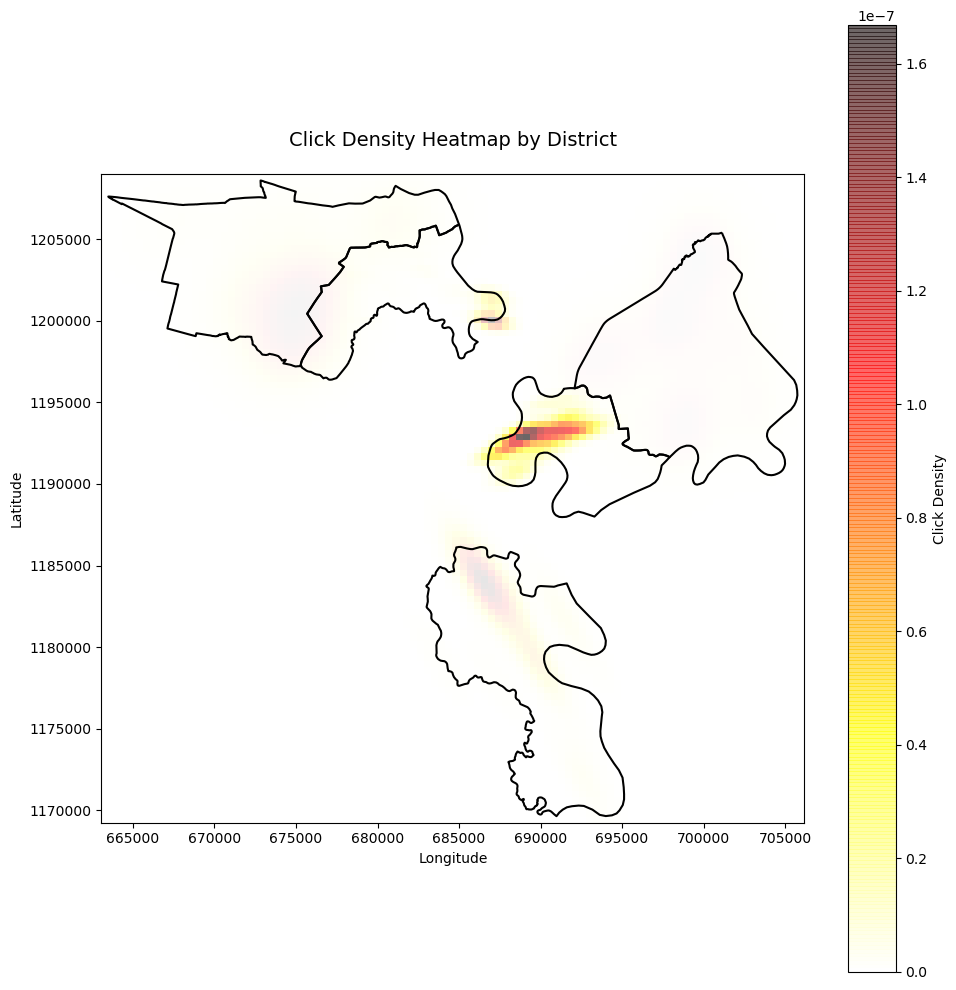

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def create_heatmap(top_5_districts, clicks_in_top_5_districts, output_path='heatmap.png'):
    fig, ax = plt.subplots(figsize=(10, 10))

    total_bounds = top_5_districts.total_bounds
    x_min, y_min, x_max, y_max = total_bounds

    padding = 0.01
    x_padding = (x_max - x_min) * padding
    y_padding = (y_max - y_min) * padding

    x_min -= x_padding
    x_max += x_padding
    y_min -= y_padding
    y_max += y_padding

    # Set up grid for heatmap
    grid_size = 100
    x_grid = np.linspace(x_min, x_max, grid_size)
    y_grid = np.linspace(y_min, y_max, grid_size)
    xx, yy = np.meshgrid(x_grid, y_grid)

    for idx, district in enumerate(top_5_districts.geometry):
        # Filter clicks within the current district
        mask = clicks_in_top_5_districts.geometry.within(district)
        points_within = clicks_in_top_5_districts[mask]

        if len(points_within) > 1:
            x = points_within.geometry.x
            y = points_within.geometry.y

            positions = np.vstack([xx.ravel(), yy.ravel()])
            values = np.vstack([x, y])

            kde = gaussian_kde(values, bw_method='scott')
            z = np.reshape(kde(positions), xx.shape)

            im = ax.imshow(z, extent=[x_min, x_max, y_min, y_max], origin='lower', cmap='hot_r', alpha=0.6)

    # Plot district boundaries
    top_5_districts.boundary.plot(ax=ax, color='black', linewidth=1.5)

    # Set axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Colorbar for density
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Click Density', fontsize=10)

    # Add plot title and labels
    plt.title("Click Density Heatmap by District", fontsize=14, pad=20)
    ax.set_xlabel('Longitude', fontsize=10)
    ax.set_ylabel('Latitude', fontsize=10)
    ax.set_aspect('equal', 'box')

    # Save the heatmap to a file
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight', dpi=500, facecolor='white', edgecolor='none')
    plt.show()

# Example of usage
create_heatmap(top_five_growth, joined_gdf, 'clustered_heatmap.png')